### Technical note on histograms in R:

[1] 0.5

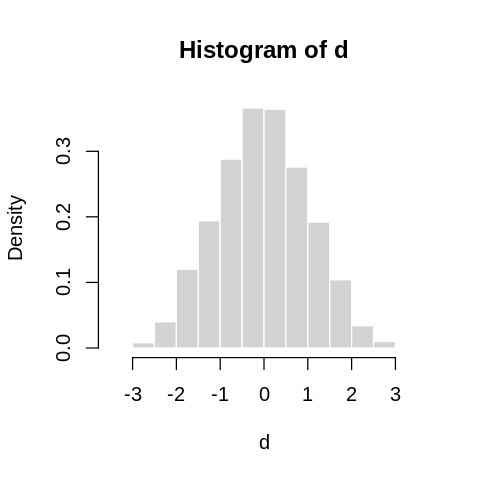

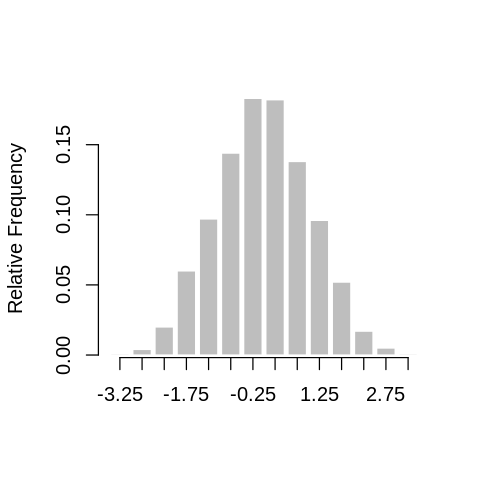

In [ ]:
# NOTES ON HISTOGRAMS IN R:
# hist() will plot when prob=T (same as freq=F) the $density such that the area under the curve is 1
# Therefore the height of the bars will vary with the number of breaks, and may not reflect the relative frequency.
options(repr.plot.height=4, repr.plot.width=4)
set.seed(0)

# From here: https://stackoverflow.com/a/18085500/4089351

d = rnorm(1000)
n = 1000
d = rnorm(n)

histogram = hist(d, breaks=10, prob=T, border=F)
unique(diff(histogram$breaks)) # Because the size of the base of the rectangles is 0.5, the height will be double the tru relative freq.

# The fix. Notice that I redefine the histogram simply to show how simple the call is with with this fix.
h = hist(d, plot=F)
bp = barplot(h$counts/sum(h$counts), border=F)
axis(1, at=c(bp), labels=h$mids)
title(ylab="Relative Frequency")

✅

### CENTRAL LIMIT THEOREM

From Wikipedia:

> In probability theory, the central limit theorem (CLT) establishes that, in many situations, when independent random variables are summed up, their properly normalized sum tends toward a normal distribution **even if the original variables themselves are not normally distributed.**
>
> The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

If the source population is normally distributed to begin with (as in the simulation below), the sampling distribution of the mean (i.e. taking repetitive samples (technically with replacement) from the population and computing the mean of each samples, and then plotting the histogram of these means of samples) will be also normally distributed, but with decreased standard deviation (the factor by which the standard deviation will decrease is $1/\sqrt(n),$ with $n$ being the size of the samples.

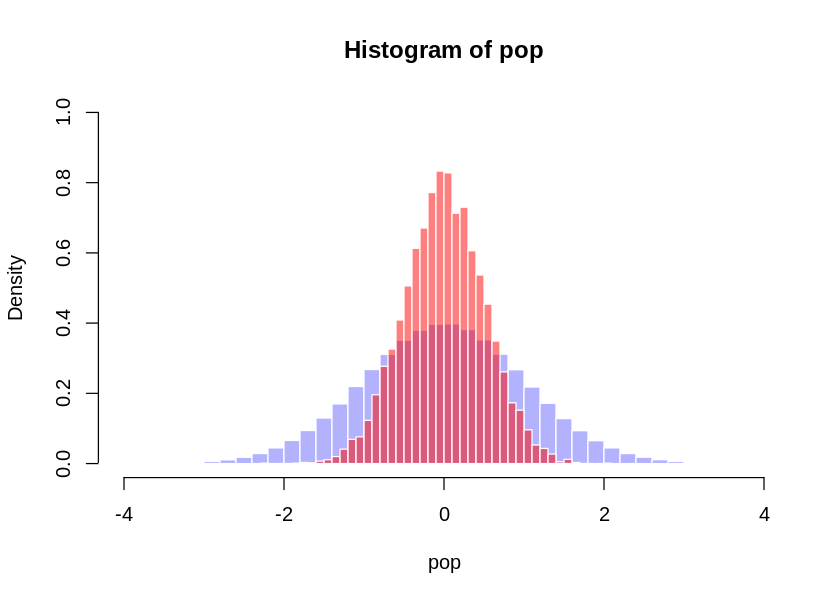

In [ ]:
options(repr.plot.height=5, repr.plot.width=7)

pop = rnorm(1e6)
H = hist(pop, plot=F)
hist(pop, xlim = c(-4,4), breaks = 50, border=F, prob=T, ylim =c(0,1), col=rgb(0,0,1,0.3))

nsam = 1e4
samples = rep(0,nsam)
samsize = 4 
for (i in 1:nsam) samples[i] <- mean(sample(pop, samsize, replace=T))
hist(samples, xlim = c(-4,4), breaks = 50, border=F, add = T, col=rgb(1,0,0,0.5), prob=T)

The interesting part is if the original distribution is not Gaussian. In the example below the population from which we draw random samples is uniform:

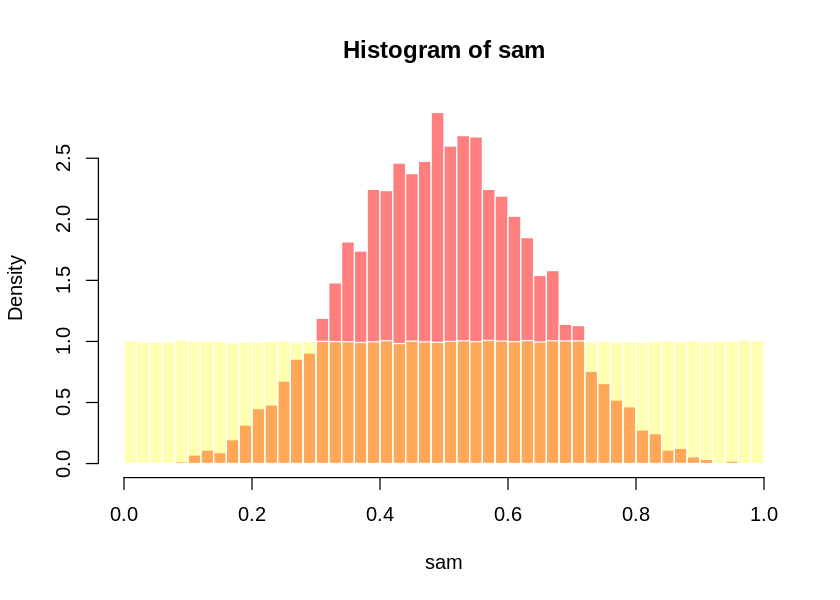

In [ ]:
# CLT with original population uniform:

pop2 = runif(1e6)

sam = rep(0,1e4)
n = 4
for (i in 1:length(sam)) sam[i] <- mean(sample(pop2, n, replace=T))

hist(sam, xlim = c(0,1), breaks = 50, border=F, col=rgb(1,0,0,0.5), prob=T)
hist(pop2, xlim = c(0,1), breaks = 50, border=F, prob=T, ylim =c(0,1), col=rgb(1,1,0,0.3), add=T)

If the distribution of the original population is not that symmetric, as in the case of the exponential (below), the CLT may not be so obvious with $n = 4:$

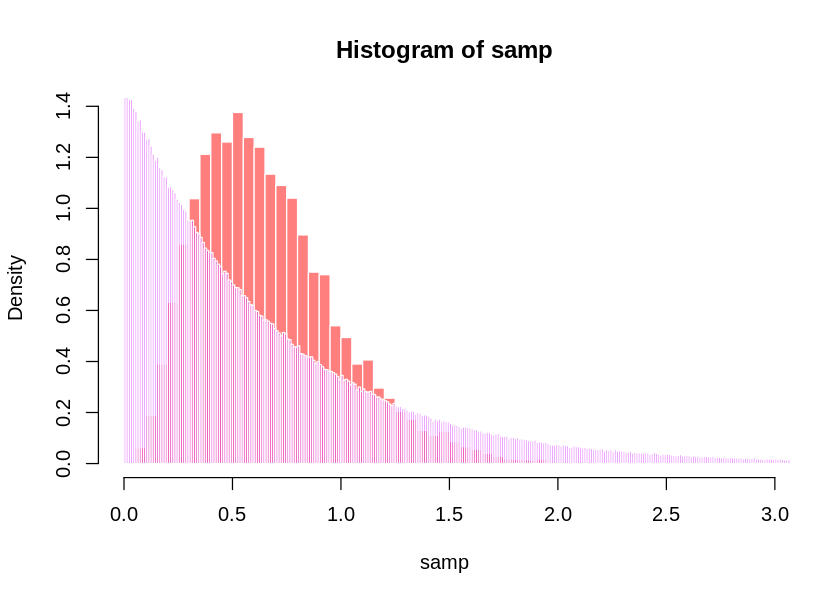

In [ ]:
# With samples of only 4, the CLT is already well apparent, although the asymmetry of the exponential is still obvious:

pop3 = rexp(1e6,1.5)

samp = rep(0,1e4)
n = 4
for (i in 1:length(samp)) samp[i] <- mean(sample(pop3, n, replace=T))

hist(samp, breaks = 50, border=F, col=rgb(1,0,0,0.5), prob=T)
hist(pop3, breaks = 1000, border=F, prob=T, ylim =c(0,1), col=rgb(0.8,0,1,0.4), add=T)

But the sampling distribution becomes totally Gaussian if we increase the sample size to, for instance, $n=40:$

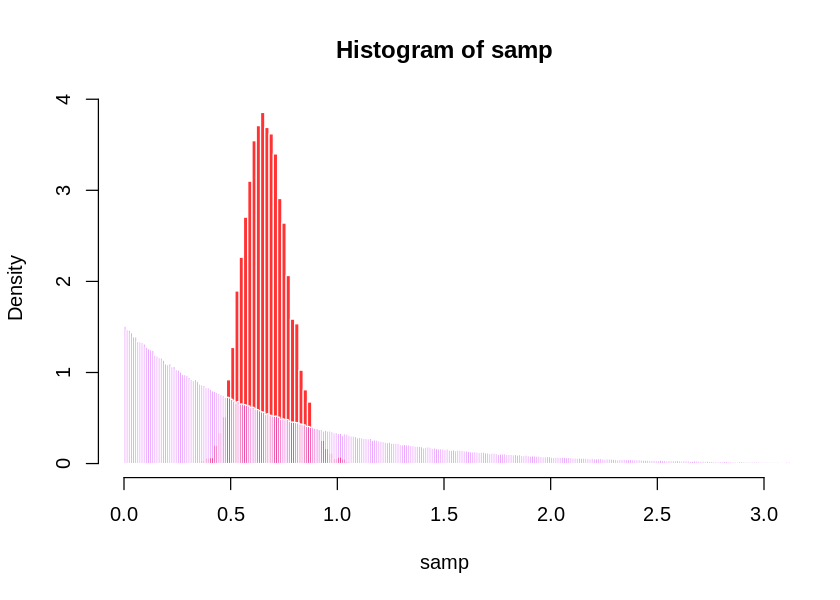

In [ ]:
# Increasing the smple size to 40 gives an unequivocally normal distribution of the sample means (sampling distribution):

pop3 = rexp(1e6,1.5)

samp = rep(0,1e4)
n = 40
for (i in 1:length(samp)) samp[i] <- mean(sample(pop3, n, replace=T))

hist(samp, breaks = 50, border=F, col=rgb(1,0,0,0.8), prob=T, xlim=c(0,3))
hist(pop3, breaks = 1000, border=F, prob=T, ylim =c(0,1), col=rgb(0.8,0,1,0.4), add=T)

✅

The distribution function of a random variable $X$ is given by

$$F(x)=\begin{cases}
cx^3 && 0 \leq x<3\\
1 && x \geq 3 \\
0 && x <0
\end{cases}$$

Find $(a)$ the constant $c$, $(b)$ the density function, $(c)$ $P(X>1),$ $(d)$ $P(1 < X <2)$.

(a) Since the function is continuous, the limit as 

$$\lim_{x\to 3} F(x)= F(3)= c3^3 = 1$$

Therefore $c = 1/27.$

(b) Simply the derivative of $F(x)$ i.e. $$f(x) = \frac{x^2}{9}$$

(c) $$\int_{x=1}^3 \frac{x^2}{9} dx = F(3) - F(1)= 1/27 x^3 \mid_1^3 = 1 - 1/27 = 26/27.$$

(d) is the corresponding integral.

✅

The weights of a large number of miniature poodles are approximately normally distributed with a mean of $9$ kilograms and a standard deviation of $0.7$ kilogram. If measurements are recorded to the nearest tenth of a​ kilogram, find the proportion of these poodles with weights
​ (a) over $9.9$ ​kilograms; 
​ (b) of at most $9.3$ ​kilograms;
​ (c) between $8.4$ and $9.8$ kilograms inclusive.

[1] 0.1

[1] 0.1

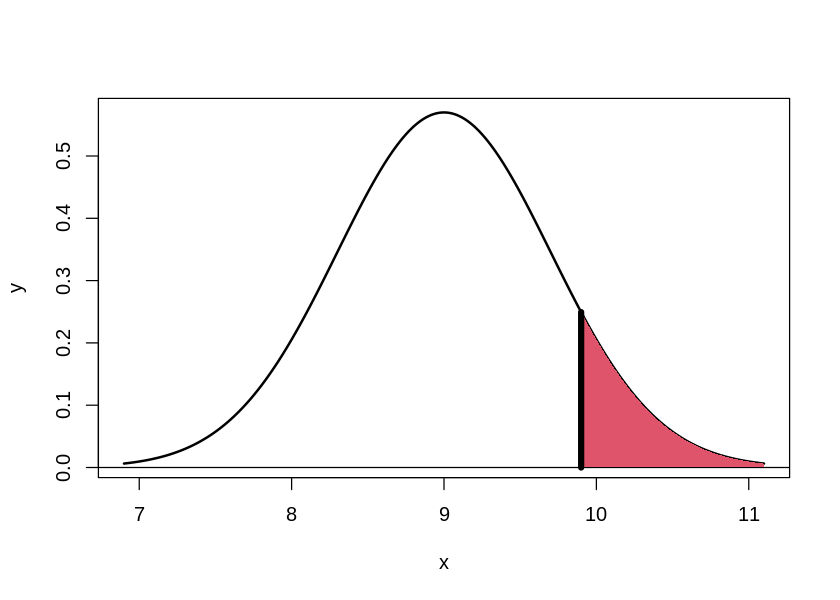

In [ ]:
# For (a) this is what we are trying to to get (AUC in red)""
mu = 9
sig = 0.7
lim = mu + c(-1,1) * 3 * sig
x = seq(min(lim), max(lim), 0.004)
y = dnorm(x,mu,sig)

X = seq(9.9, max(lim), 0.004)
Y = dnorm(X,mu,sig)
plot(x,y, type='l', lwd=2)

abline(h=0)

polygon(c(min(X), X, max(lim)), c(0, Y, 0), col=2, border=F)
segments(9.9,0 ,9.9, dnorm(9.9,9,0.7), lwd=5)


# And this is how to calculate it:

auc= pnorm(9.9, 9, 0.7, lower.tail = F) 
round(auc,1) # This is the result with the call 'lower.tail' in R
round(1 - pnorm(9.9,9,0.7),1) # This is similar to what we would do if we were using tables.

[1] 0.6658824

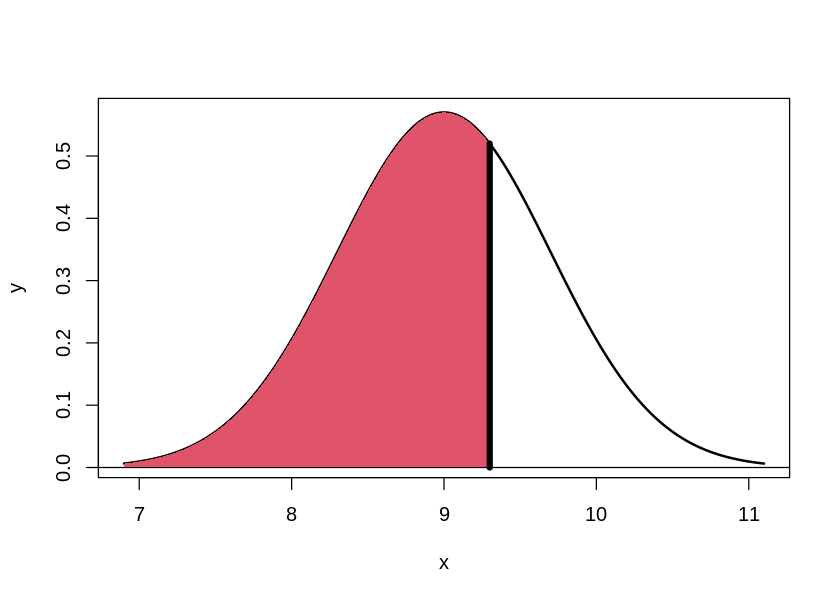

In [ ]:
# For (b)
# This is the AUC that we are trying to calculate (in red):
X = seq(min(lim), 9.3, 0.004)
Y = dnorm(X,mu,sig)
plot(x,y, type='l', lwd=2)

abline(h=0)

polygon(c(min(X), X, 9.3), c(0, Y, 0), col=2, border=F)
segments(9.3,0 ,9.3, dnorm(9.3,9,0.7), lwd=5)

# This is the actual call in R:
pnorm(9.3, 9, 0.7)

[1] 0.7

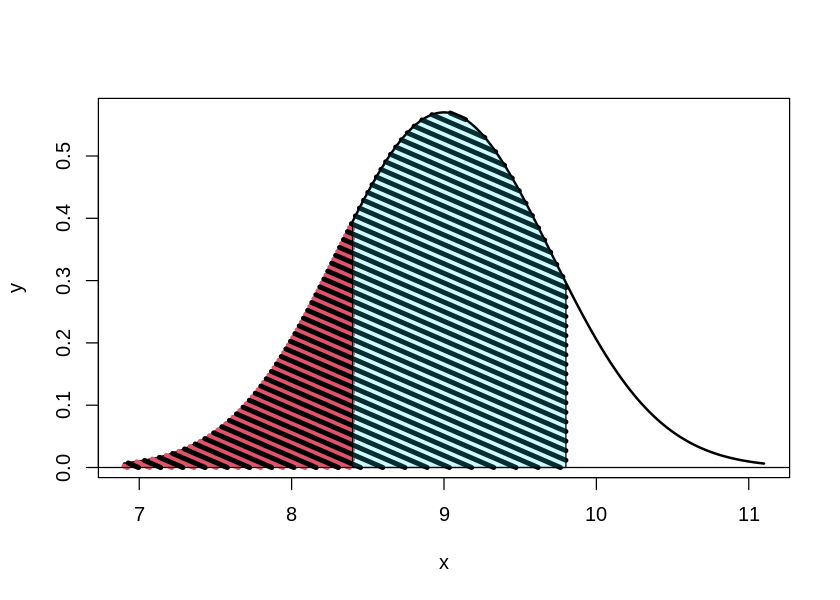

In [ ]:
# For (c):
# We have to calculate the difference between the two areas under the curve:
mu = 9
sig = 0.7
lim = mu + c(-1,1) * 3 * sig

plot(x,y, type='l', lwd=2)

X = seq(min(lim), 8.4, 0.004)
Y = dnorm(X, mu, sig)
Xp = seq(min(lim), 9.8, 0.004)
Yp = dnorm(Xp, mu, sig)
polygon(c(min(lim), X, 8.4), c(0, Y, 0), col=2, lwd=4,
  density = 20, angle = 145, border=F)

polygon(c(min(lim), Xp, 9.8), c(0, Yp, 0), col='black', lwd=4, 
  density = 10, angle = 145, border=F)

Xpp = seq(max(X), max(Xp), 0.004)
Ypp = dnorm(Xpp, mu, sig)
polygon(c(max(X), Xpp, max(Xp)), c(0,Ypp, 0), col=rgb(0.1,0.9,1,0.2))
abline(h=0)

# And this is the actual call in R:

c= (pnorm(9.8,9,0.7)-pnorm(8.4,9,0.7))
round(c,1)

✅

> According to a survey by the Administrative Management​ Society, one-half of U.S. companies give employees 4 weeks of vacation after they have been with the company for 15 years. Complete parts​ (a) and​ (b).
>
> ​(a) Find the probability that among $6$ companies surveyed at​ random, the number that give employees 4 weeks of vacation after 15 years of employment is anywhere from $2$ to $4.$

This is a problem where there are only $2$ choices: either they get a month off ("success") or not. The probability of being one of the lucky employees that gets a month off is $\Pr(M) = 1/2.$

In $6$ companies surveyed there could be $0$ companies that give this benefit out of randomness (selection of particular companies), or $2$ companies, or... all of them.

But we are looking for the probability that the number of companies offering this benefit is between $2$ and $4.$

The result for each company follows a Bernouilli distribution (e.g. H or T, or "success" / "failure") in this case at $50-50$ probability, $p = 0.5$. Hence the probability of having a given number of "successes" is going to follow a [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution):

$$\Pr(X=k) = {n \choose k} p^k \, q^{n-k}$$

Therefore the probability of getting, for example, $k = 2$ "successes" among $n = 6$ trials is 

$$\Pr(X=2) = {6 \choose 2} 0.5^2 \, 0.5^{4}$$


In [ ]:
# We can do this in R either "manually" (first line), or using the built-in function 'dbinom()':
choose(6,2) * 0.5^2 * 0.5^4
dbinom(2,6,0.5)

[1] 0.234375

[1] 0.234375

We could now calculate the same for $3$ and $4$ and add up the results:

In [ ]:
choose(6,2) * 0.5^2 * 0.5^4 + choose(6,3) * 0.5^3 * 0.5^3 + choose(6,4) * 0.5^4 * 0.5^2

[1] 0.78125

Alternatively we can use the function 'pbinom()' twice:

In [ ]:
# For example the prob of getting a number up to 2 is:
choose(6,0) * 0.5^0 * 0.5^6 + choose(6,1) * 0.5^1 * 0.5^5 + choose(6,2) * 0.5^2 * 0.5^4
pbinom(2,6,0.5)

[1] 0.34375

[1] 0.34375

In [ ]:
# The probability of getting up to 4 companies offering this benefit among our sample of $6$ companies is:
# pbinom(4,6,0.5)
# But we need to subtract the probability of getting $0$ or $1,$ which is:

pbinom(4,6,0.5) - pbinom(1,6,0.5)

[1] 0.78125

Manually, this would be:

$$\Pr(2 \geq X \leq 4) =\sum_{k=2}^{4} {6 \choose k} 0.5^k \, 0.5^{6-k}$$

Therefore,

$$\Pr(X=2) = {6 \choose 2} 0.5^2 \, 0.5^{4} +  {6 \choose 3} 0.5^3 \, 0.5^{3} +  {6 \choose 4} 0.5^4 \, 0.5^{2}$$

In [ ]:
choose(6,2) * 0.5^2 * 0.5^4 + choose(6,3) * 0.5^3 * 0.5^3 + choose(6,4) * 0.5^4 * 0.5^2

[1] 0.78125

Visually, this is expressed as the PMF (probability mass function), which gives you the probability for each outcome in a discrete distribution (meaning that the outcomes are not the real line, but rather 'heads' or 'tails', or the natural number of 'successes', etc). When the outcome can be any number in the real line (e.g. the weight of something, or the time waiting, or the temperature) the equivalent to the PMF is the PDF (probability density function). The PDF does not plot the probability, but rather the "probability *density*.

Here is the PMF of the binomial:

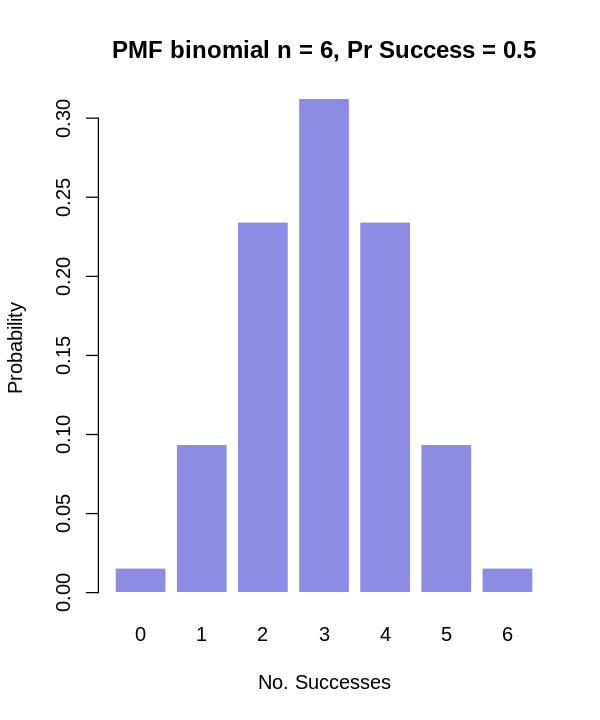

In [ ]:
options(repr.plot.height=6, repr.plot.width=5)

successes = 0:6
barplot(dbinom(successes, 6, 0.5) ~ successes, border=F,
    col=rgb(0.1,0.1,0.8,0.5),
    xlab='No. Successes', ylab= 'Probability', 
    main='PMF binomial n = 6, Pr Success = 0.5')

The CDF (cumulative distribution function) expresses the probability of a given number of successes OR less:

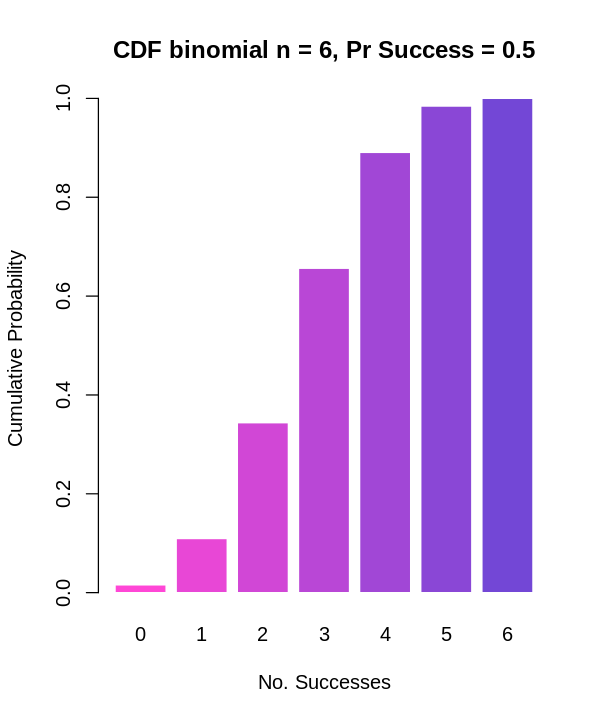

In [ ]:
successes = 0:6
barplot(pbinom(successes, 6, 0.5) ~ successes, border=F,
    col=c(rgb(seq(1,.1,by=-(0.9-0.1)/length(successes)),0.1,0.8,0.8)),
    xlab='No. Successes', ylab= 'Cumulative Probability', 
    main='CDF binomial n = 6, Pr Success = 0.5')

An interesting thing about the binomial is that as $m \to \infty$ it converges to the Normal, even though the binomial is a discrete distribution and the normal is continuous. This is the justification for the normal approximation of the binomial when $n \; p > 5$ and $n \; q > 5$. 

As a reminder the mean will be the mean of the binomial, e.g. $n\,p,$ and the SD also the binomial, $\sqrt{n\,p\,q}.$

We start seeing this just with $n=100$ trials: 

[1] 4.84743e-02 1.91314e-07

[1] 4.839414e-02 2.973439e-07

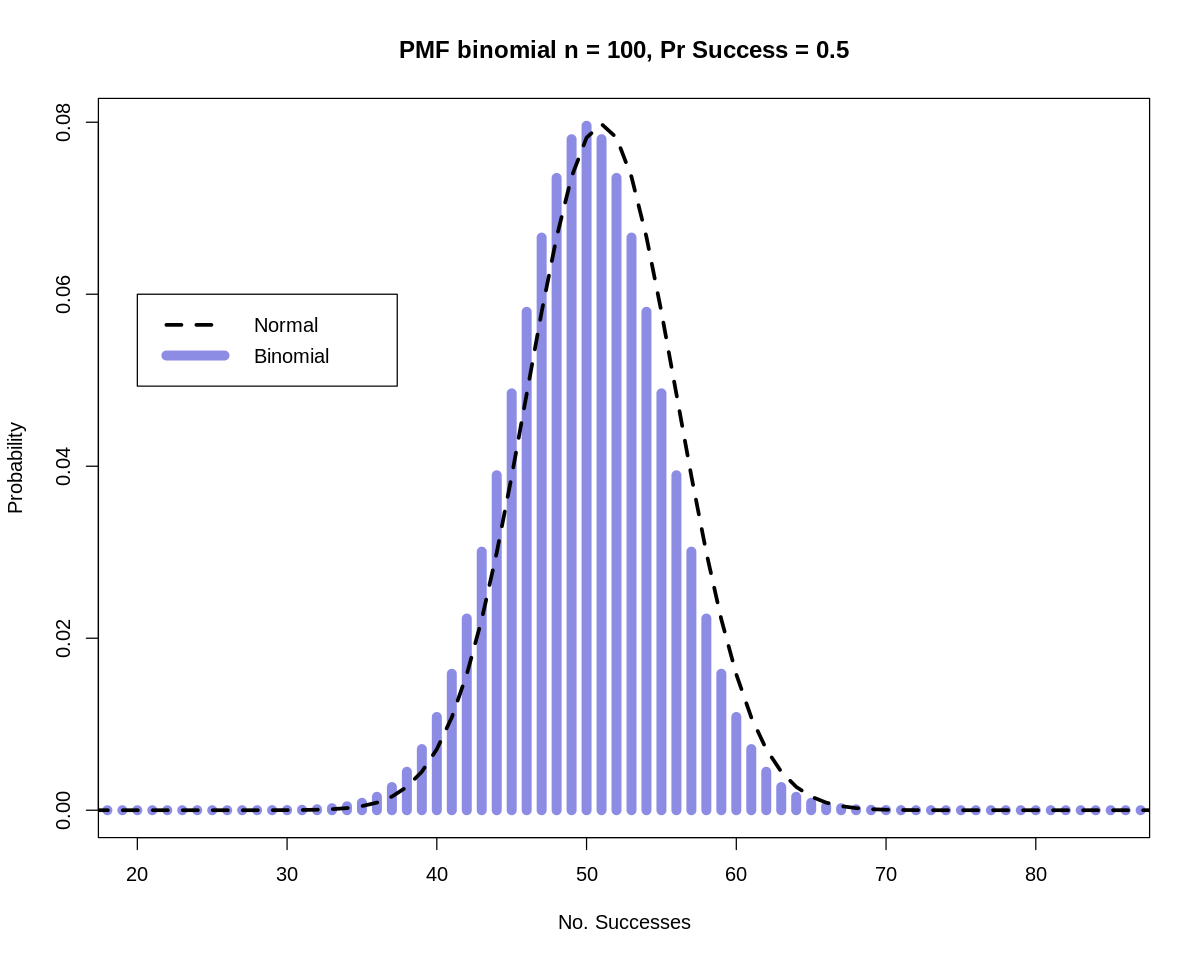

In [ ]:
options(repr.plot.height=8, repr.plot.width=10)
n = 100
successes = 0:n
p = 0.5
plot(successes, dbinom(successes, n, p), type='h', lwd=8,
    xlim=c(20,85),   
    col=rgb(0.1,0.1,0.8,0.5),
    xlab='No. Successes', ylab= 'Probability', 
    main='PMF binomial n = 100, Pr Success = 0.5')

mu = n * p
sig = sqrt(n * p * (1 - p))
lines(dnorm(successes, mu, sig), lty = 2, lwd=3)
legend(20, 0.06, c("Normal", "Binomial"), lty=c(2,1), lwd=c(3,8), col=c('black',rgb(0.1,0.1,0.8,0.5)))

# The plot appears offset, so let's check there is no gross misunderstanding:

# For example, with successes suc = 55 and 75
suc = c(55, 75)
dbinom(suc, n, p)
dnorm(suc, mu, sig)

✅

> Given a normal distribution with $\mu=35$ and $\sigma=6$​, find​ (a) the normal curve area to the right of $x=19$​; ​(b) the normal curve area to the left of $x=28$​; ​(c) the normal curve area between $x=37$ and $x=48$​; ​(d) the value of x that has $80\%$ of the normal curve area to the​ left; and​ (e) the two values of x that contain the middle $​85\%$ of the normal curve area.

In [ ]:
options(repr.plot.height=7, repr.plot.width=7)

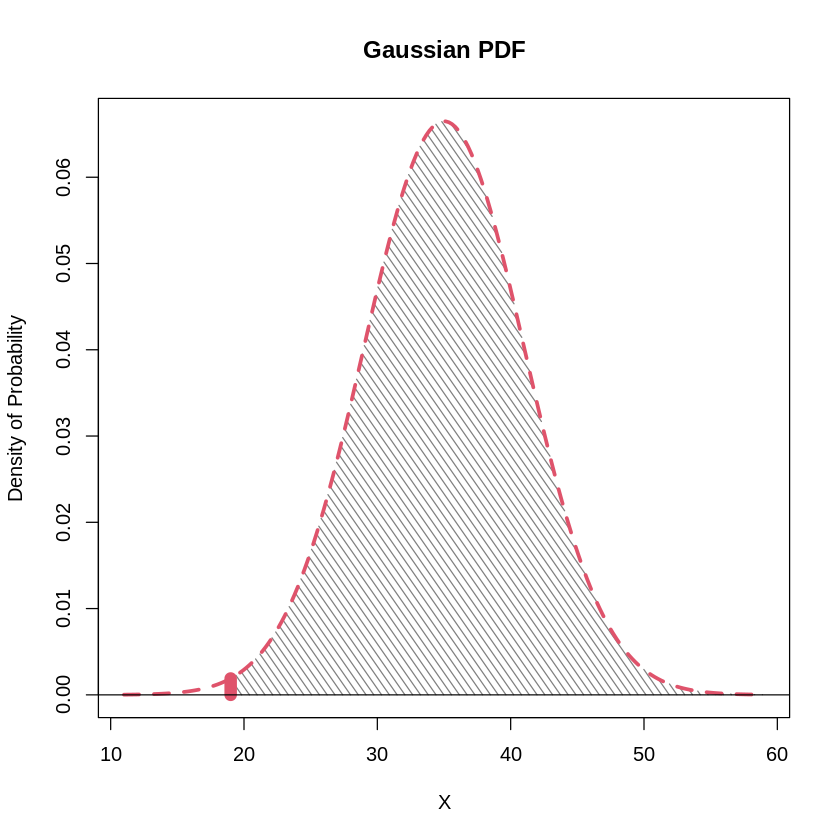

In [ ]:
# The AUC that we are trying to calculate is hatched in the plot below:

mu = 35
sigma = 6
lim = 4 * sigma
X = seq(mu - lim, mu + lim, length=200)
Y = dnorm(X, mean=mu, sd=sigma)
plot(X, Y, type="n", main = "Gaussian PDF", xlab='X', ylab='Density of Probability')

# To paint (a) the normal curve area to the right of  x=19:

x = seq(19, mu + lim, length=100)
y = dnorm(x, mu, sd=sigma)

polygon(c(19,x), c(0,y), border=F, col = rgb(0,0,0,.5),
  density = 20, angle = 125)

lines(X, Y, lwd=3, lty=2, col = 2)
segments(19,0,19,dnorm(19, mu, sigma), lwd=10, col=2)
abline(h=0)

In [ ]:
# The answer is:

1 - pnorm(19, mu, sigma)

[1] 0.9961696

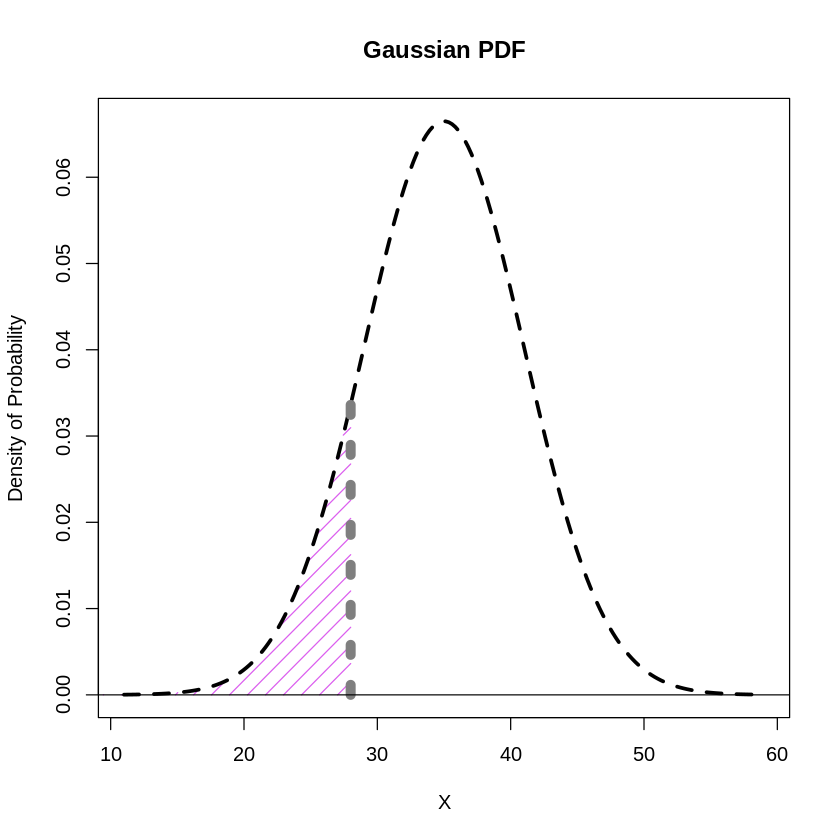

In [ ]:
# b) the normal curve area to the left of x = 28:
plot(X, Y, type="n", lwd=2, main = "Gaussian PDF", xlab='X', ylab='Density of Probability')
x = seq(mu - lim, 28, length=100)
y = dnorm(x, mean=mu, sd=sigma)
polygon(c(- lim, x, 28), c(0, y, 0), col=c(rgb(0.8,0.1,0.9,0.7)), 
  density = 10, angle = 45, border=F)
lines(X, Y, lwd=3, lty=2)
segments(28,0,28,dnorm(28, mean=mu, sd=sigma), lwd=8, col='gray50', lty=3)
abline(h=0)

In [ ]:
# Then answer is

pnorm(28, mu, sigma)

[1] 0.1216725

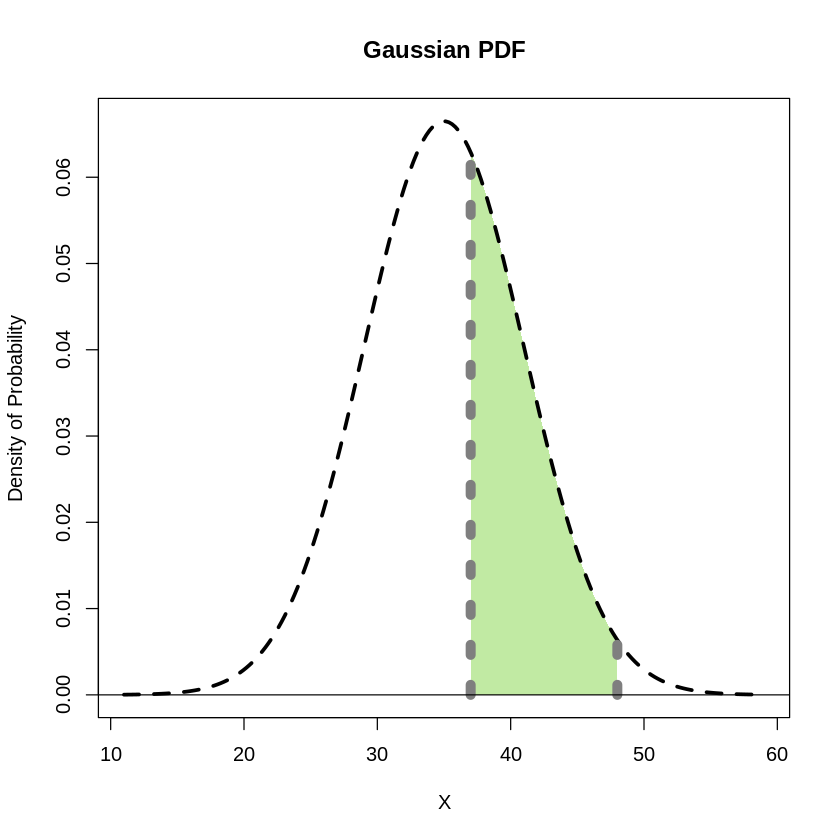

In [ ]:
# (c) the normal curve area between  x=37  and  x=48 ​
plot(X, Y, type="n", lwd=2, main = "Gaussian PDF", xlab='X', ylab='Density of Probability')
x = seq(37, 48, length=100)
y = dnorm(x, mean=mu, sd=sigma)
polygon(c(37, x, 48), c(0, y, 0), col=c(rgb(0.4,0.8,0.1,0.4)), border = F)
lines(X, Y, lwd=3, lty=2)
segments(37,0,37,dnorm(37, mean=mu, sd=sigma), lwd=8, col='gray50', lty=3)
segments(48,0,48,dnorm(48, mean=mu, sd=sigma), lwd=8, col='gray50', lty=3)
abline(h=0)

In [ ]:
# The answer is

pnorm(48, mu, sigma) - pnorm(37, mu, sigma)

[1] 0.3543112

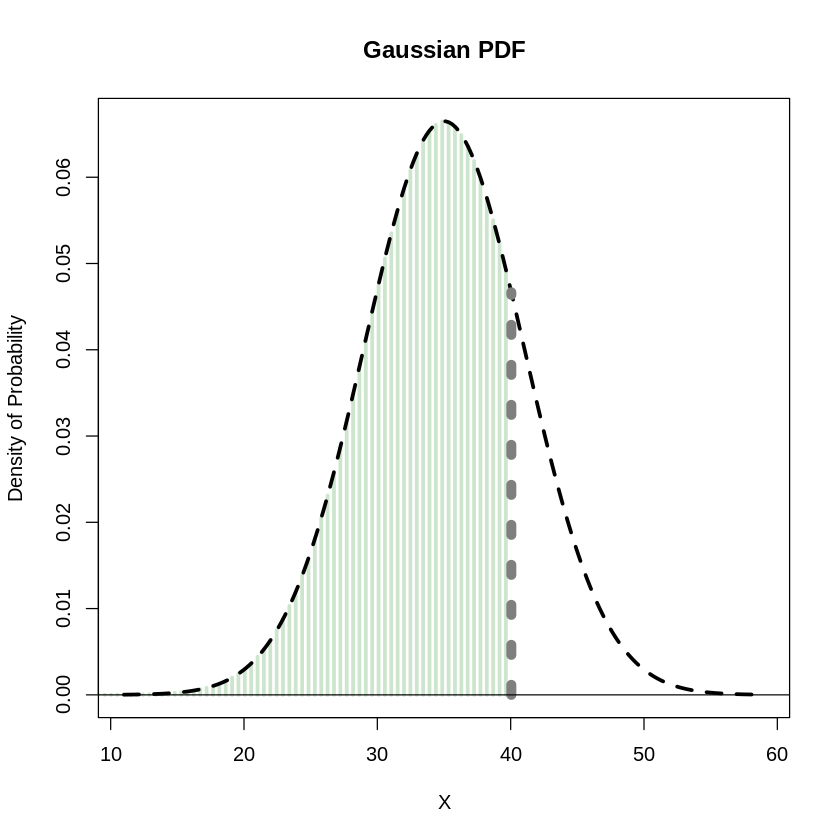

In [ ]:
# ​(d) the value of x that has  80%  of the normal curve area to the​ left
plot(X, Y, type="n", main = "Gaussian PDF", xlab='X', ylab='Density of Probability')
x = seq(-lim, qnorm(0.8,mu,sigma), length=100)
y = dnorm(x, mean=mu, sd=sigma)
polygon(c(-lim, x, qnorm(0.8,mu,sigma)), c(0, y, 0), col=rgb(0,0.5,0,0.2), border=F, lwd=3,
    density = 20, angle = 90)
lines(X, Y, lwd=3, lty=2)
segments( qnorm(0.8,mu,sigma),0, qnorm(0.8,mu,sigma), dnorm( qnorm(0.8,mu,sigma), mean=mu, sd=sigma), 
  lwd=8, col='gray50', lty=3)
abline(h=0)

In [ ]:
# Here we are looking for the QUANTILE (THE VALUE OF X), not the area under the curve, which is given as 80%

qnorm(0.8, mu, sigma)

[1] 40.04973

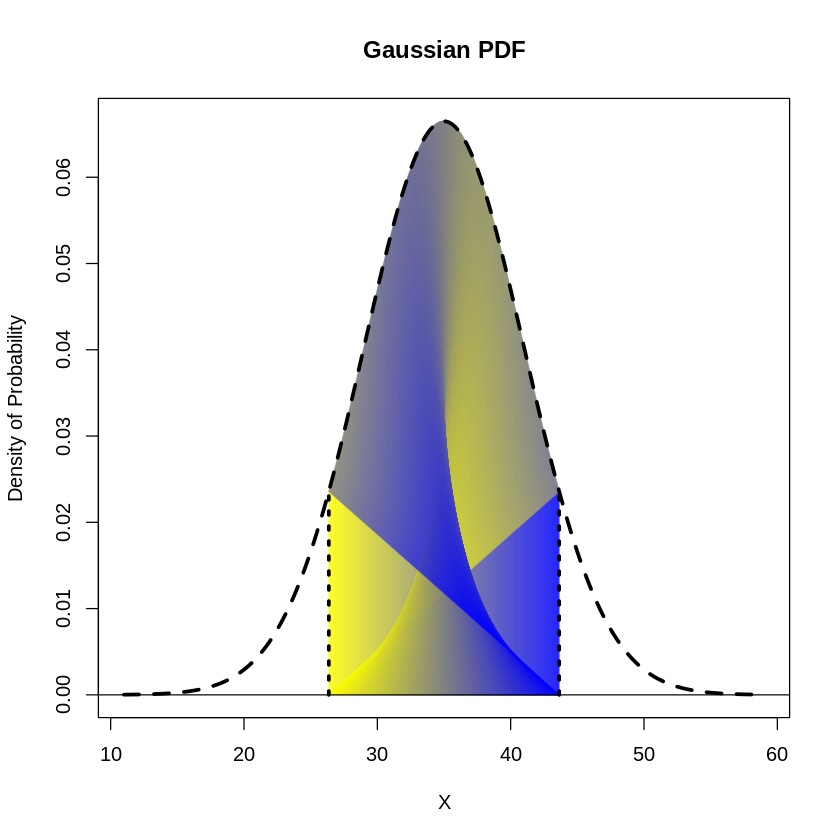

In [ ]:
# e) the two values of x that contain the middle  ​85%  of the normal curve area.
tails = (1 - 0.85) / 2

mu = 35
sigma = 6
lim = 4 * sigma

X = seq(mu - lim, mu + lim, length=200)
Y = dnorm(X, mean=mu, sd=sigma)

plot(X, Y, type="n", main = "Gaussian PDF", xlab='X', ylab='Density of Probability', lwd=5)
xx = seq(qnorm(tails,mu,sigma), qnorm(1 - tails,mu,sigma), length=1000)
yy = dnorm(xx, mean=mu, sd=sigma)

l = length(xx)

for(i in 1:l){
  polygon(c(xx[i], xx[i]), c(yy[i], rep(0,l)[i]), 
          border=rgb(1 - 1/l * i, 1 - 1/l * i, 1/l * i,  0.3),
          col=   rgb(1 - 1/l * i, 1 - 1/l * i, 1/l * i,  0.3))
}

for(i in 1:l){
  polygon(c(xx[i], rev(xx)[i]), c(rep(0,l)[i], yy[i]), 
          border=rgb(1 - 1/l * i, 1 - 1/l * i, 1/l * i,  0.3),
          col=   rgb(1 - 1/l * i, 1 - 1/l * i, 1/l * i,  0.3))
}

lines(X, Y, lwd=3, lty=2)
segments( qnorm(tails,mu,sigma),0, qnorm(tails,mu,sigma),dnorm( qnorm(tails,mu,sigma), mean=mu, sd=sigma), lwd=3, lty=3)
segments( qnorm(1-tails,mu,sigma),0, qnorm(1-tails,mu,sigma),dnorm( qnorm(1-tails,mu,sigma), mean=mu, sd=sigma), lwd=3, lty=3)
abline(h=0)

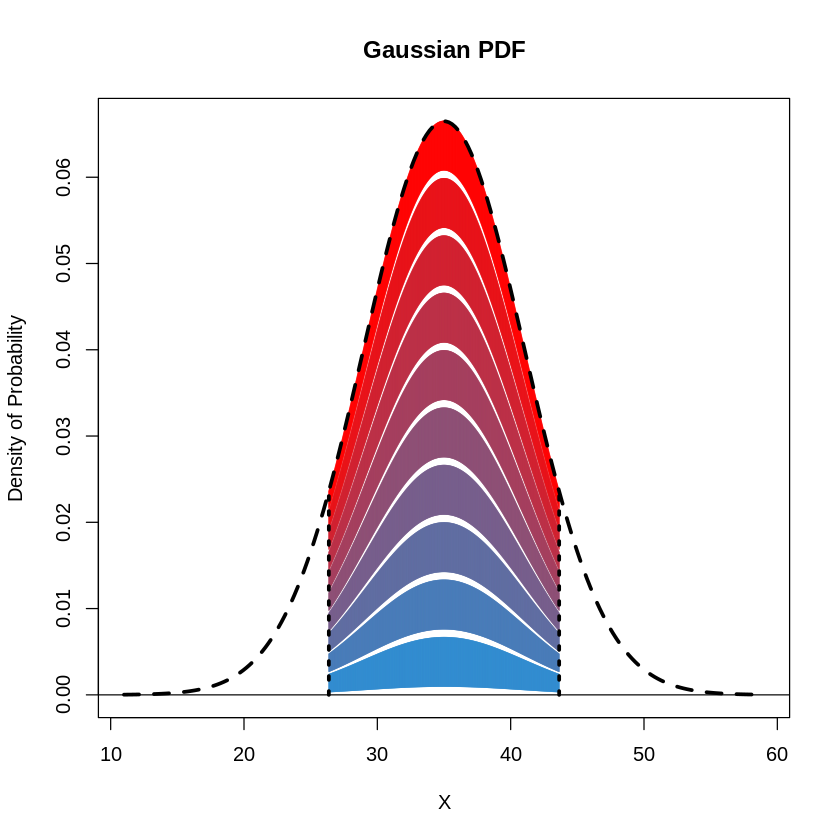

In [ ]:
# This is just playing with colors on the plot:

mu = 35
sigma = 6
lim = 4 * sigma
tails = (1 - 0.85) / 2
X = seq(mu - lim, mu + lim, length=200)
Y = dnorm(X, mean=mu, sd=sigma)

plot(X, Y, type="n", main = "Gaussian PDF", xlab='X', ylab='Density of Probability', lwd=5)
xx = seq(qnorm(tails,mu,sigma), qnorm(1 - tails,mu,sigma), length=1000)
yy = dnorm(xx, mean=mu, sd=sigma)

l = length(xx)

z = 10
for (j in 0:(z-1)){
    for(i in 1:l){
  polygon(c(xx[i], xx[i]), c(yy[i] - j/z * yy[i], yy[i] - (j + 0.85)/z * yy[i]), 
          border= rgb(1 - 0.9 * j/z, 0.6 * j/z, 0.9 * j/z,  0.6),
          col=    rgb(1 - 0.9 * j/z, 0.6 * j/z, 0.9 * j/z,  0.2))
  }
}

lines(X, Y, lwd=3, lty=2)
segments( qnorm(tails,mu,sigma),0, qnorm(tails,mu,sigma),dnorm( qnorm(tails,mu,sigma), mean=mu, sd=sigma), lwd=3, lty=3)
segments( qnorm(1-tails,mu,sigma),0, qnorm(1-tails,mu,sigma),dnorm( qnorm(1-tails,mu,sigma), mean=mu, sd=sigma), lwd=3, lty=3)
abline(h=0)

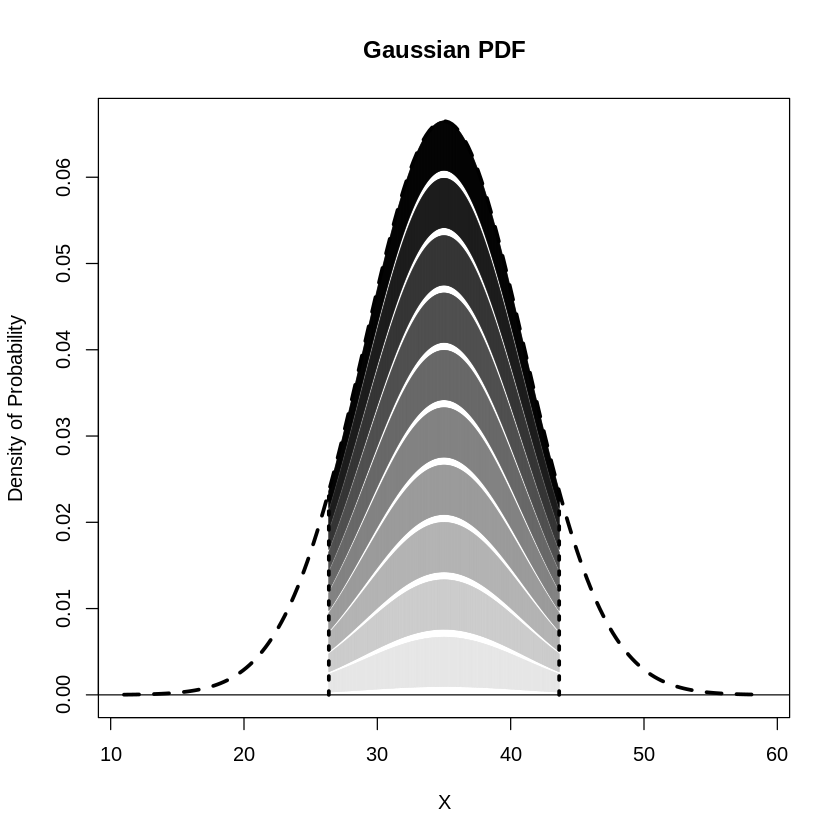

In [ ]:
# This is just playing with colors on the plot:

mu = 35
sigma = 6
lim = 4 * sigma
tails = (1 - 0.85) / 2
X = seq(mu - lim, mu + lim, length=200)
Y = dnorm(X, mean=mu, sd=sigma)

plot(X, Y, type="n", main = "Gaussian PDF", xlab='X', ylab='Density of Probability', lwd=5)
xx = seq(qnorm(tails,mu,sigma), qnorm(1 - tails,mu,sigma), length=1000)
yy = dnorm(xx, mean=mu, sd=sigma)

l = length(xx)

z = 10
for (j in 0:(z-1)){
    for(i in 1:l){
  polygon(c(xx[i], xx[i]), c(yy[i] - j/z * yy[i], yy[i] - (j + 0.85)/z * yy[i]), 
          border= rgb(j/z, j/z, j/z,  0.6),
          col=    rgb(j/z, j/z, j/z,  0.2))
  }
}

lines(X, Y, lwd=3, lty=2)
segments( qnorm(tails,mu,sigma),0, qnorm(tails,mu,sigma),dnorm( qnorm(tails,mu,sigma), mean=mu, sd=sigma), lwd=3, lty=3)
segments( qnorm(1-tails,mu,sigma),0, qnorm(1-tails,mu,sigma),dnorm( qnorm(1-tails,mu,sigma), mean=mu, sd=sigma), lwd=3, lty=3)
abline(h=0)

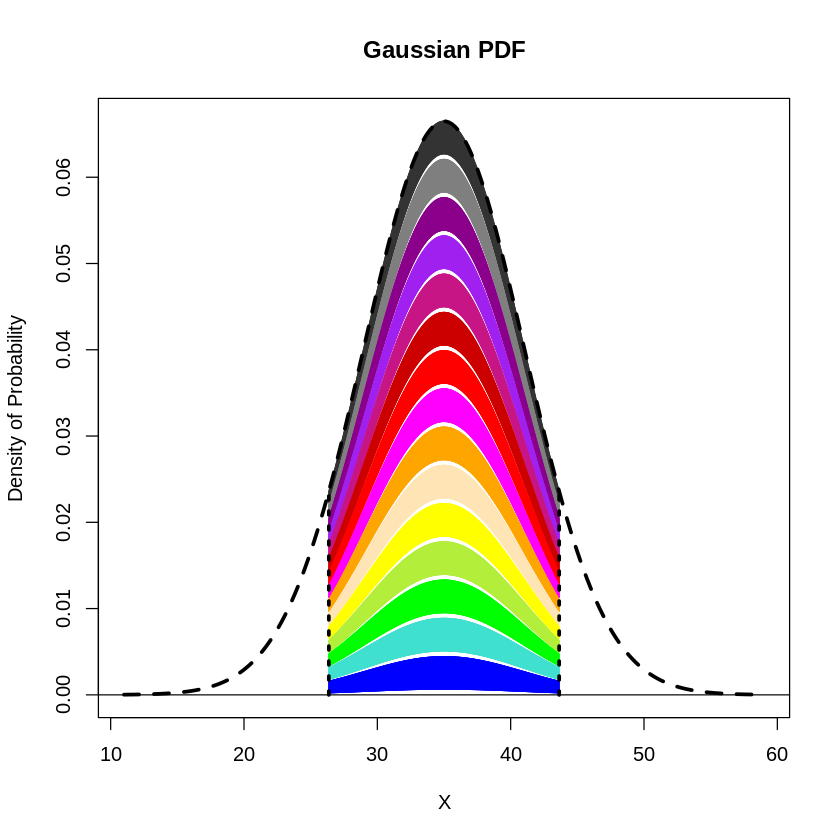

In [ ]:
# This is just playing with colors on the plot:

mu = 35
sigma = 6
lim = 4 * sigma
tails = (1 - 0.85) / 2
X = seq(mu - lim, mu + lim, length=200)
Y = dnorm(X, mean=mu, sd=sigma)

plot(X, Y, type="n", main = "Gaussian PDF", xlab='X', ylab='Density of Probability', lwd=5)
xx = seq(qnorm(tails,mu,sigma), qnorm(1 - tails,mu,sigma), length=1000)
yy = dnorm(xx, mean=mu, sd=sigma)

l = length(xx)

hue <- c('gray20', 'gray50','magenta4', 'purple', 'mediumvioletred', 
          'red3','red','magenta', 'orange', 'moccasin', 
          'yellow', 'olivedrab2', 'green','turquoise','blue','paleturquoise1')
z = 15 
for (j in 0:(z-1)){
    for(i in 1:l){
  polygon(c(xx[i], xx[i]), c(yy[i] - j/z * yy[i], yy[i] - (j + 0.85)/z * yy[i]), 
          border= hue[j+1],
          col= hue[j+1])
  }
}

lines(X, Y, lwd=3, lty=2)
segments( qnorm(tails,mu,sigma),0, qnorm(tails,mu,sigma),dnorm( qnorm(tails,mu,sigma), mean=mu, sd=sigma), lwd=3, lty=3)
segments( qnorm(1-tails,mu,sigma),0, qnorm(1-tails,mu,sigma),dnorm( qnorm(1-tails,mu,sigma), mean=mu, sd=sigma), lwd=3, lty=3)
abline(h=0)

In [ ]:
# Again asking for quantiles, not probabilities, which are given
# The lowest quantile corresponds to leaving 1/2 of 1 - 85 % of the probability to the left:
qnorm(tails, mu, sigma)
# The highest value is the quantile that leaves the same probability to the right (upper tail):
qnorm(1 - tails, mu, sigma)

[1] 26.36281

[1] 43.63719

✅

> Find the 99% confidence interval of the proportion of defective connecting tubings if the standard deviation $\sigma = 0.0015$ and the proportion $\hat p = 0.312$ in a sample of $n=85.$

In [ ]:
p.hat = 0.312
n = 85
sigma = 0.0015
alpha = 1 - 0.99
CI = p.hat + c(-1,1) * qnorm(alpha/2) * sigma / sqrt(n)
round(CI,4)

[1] 0.3124 0.3116

✅

> The mean of something or other is $\hat x=75.2$ in a sample of $n=13$ with a standard deviation $s = 7.3.$ Construct the $95\%$ CI

In [ ]:
xhat = 75.2
n = 13
s = 7.3
alpha = 1 - 0.95
CI = xhat + c(1,-1) * qt(alpha/2, n-1) * s / sqrt(n)
round(CI,4)

[1] 70.7887 79.6113

✅

> Estimate the $90\%$ CI for the population mean given the following sample:

In [ ]:
sam = c(1.01,0.96,0.96,1.04,0.98,0.95,1.03,1.01,1.01)

xbar = mean(sam)
n = length(sam)
sd = sd(sam)
alpha = 1 - 0.90
CI = xbar + c(1,-1) * qt(alpha/2, n-1) * sd / sqrt(n)
round(CI,4)

[1] 0.9741 1.0148

✅

> Estimate the $99\%$ CI for the population proportion given that $219$ defective items were found in a sample of $1,000.$

In [ ]:
# First method:

p.hat = 219/1000
n = 1000
alpha = 1 - 0.99
CI = p.hat + c(1,-1) * qnorm(alpha/2) * sqrt((p.hat*(1-p.hat))/n)
round(CI,4)

[1] 0.1853 0.2527

In [ ]:
# Second method:

p = 219/1000
n = 1000
zaltwo = qnorm(alpha/2)
ker =  (p + zaltwo^2/(2*n)) / (1 + zaltwo^2/n)
me = zaltwo/(1 + zaltwo^2/n) * sqrt(p*(1-p)/n + zaltwo^2/(4*n^2))
CI = ker + c(1,-1) * me
round(CI,4)

[1] 0.1872 0.2545

✅

> Calculate the size of the sample necessary for a $95\%$ CI with a margin of error of $0.04$

Calculating the sample size necessary is always tricky, and assumes a bunch of things. A method is to assume (a guess) that the proportion is $50\%,$ and then

$$n =\left( \frac{Z_{(1 - 0.05/2)}}{\text{ME}} \right)^2 \tilde p (1-\tilde p) =\left( \frac{Z_{(1-0.05/2)}}{0.04} \right)^2 0.5 (1-0.5)=\left(\frac{1.96}{0.04} \right)^20.5^2$$

See [here](https://online.stat.psu.edu/stat200/lesson/8/8.1/8.1.1/8.1.1.3).

In [ ]:
pest=0.5 # This is not known. Just a random guess.
n = (qnorm(1- 0.05/2) / 0.04)^2 * pest * (1 - pest)
round(n)

[1] 600

✅

> Calculate the  $98\%$ confidence interval of the population variance given that $s = 16$ in a sample of $n=16.$

If the population is normallly distributed and for a sample of size $n$ 

$$\chi^2_{n-1}\sim\frac{(n-1)s^2}{σ^2}$$ 

is distributed as a chi (/kai/) square $χ^2$ with $n-1$ degrees of freedom. 

Therefore 

$$\frac{(n-1)s^2}{\chi^2_{n-1}(1 -\frac {\alpha}{2})}\leq \sigma^2 \leq \frac{(n-1)s^2}{\chi^2_{n-1}(\frac \alpha 2)}$$

The $95\%$ confidence interval cannot be calculated with the `+ c(-1,1)` R stats hack used for symmetrical (i.e. bell-shaped) distributions because the chi square PDF is asymmetric as in the plot below. So we need to calculate independently the quantiles $\chi^2_{n-1}(1 -\frac {\alpha}{2})$ and $\chi^2_{n-1}(\frac \alpha 2).$

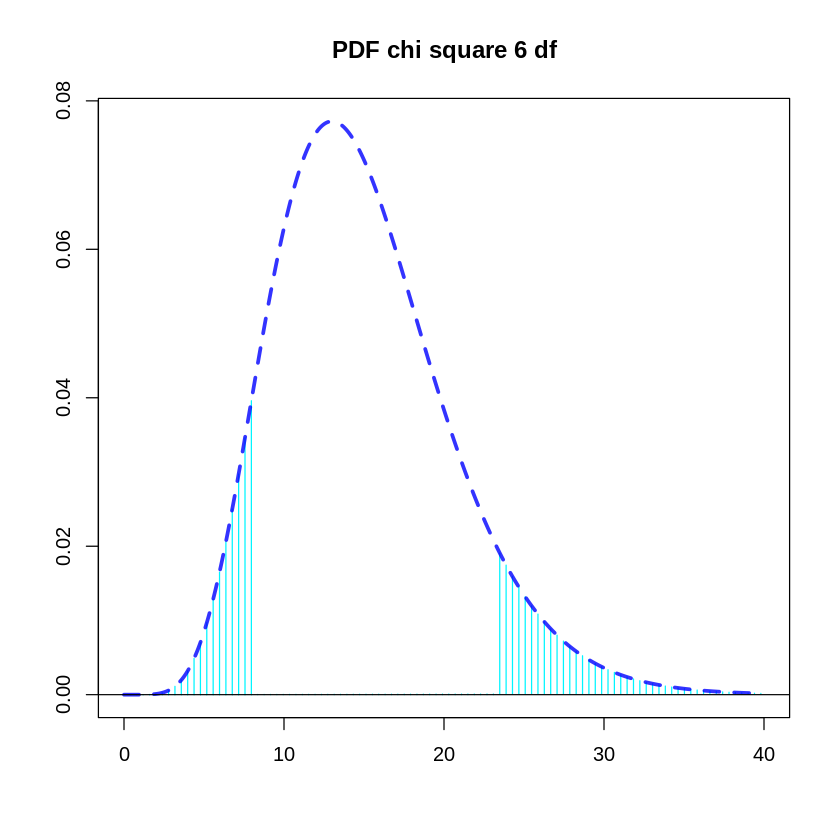

In [ ]:
n = 16
x = seq(0, 40, 0.001)
y = dchisq(x, n - 1)
plot(x, y, type='n', lwd=2,  main='PDF chi square 6 df', xlab='',ylab='')

tail = (1 - 0.85) / 2

xprime = seq(0, qchisq(tail, n - 1), length=100)
yprime = dchisq(xprime, n - 1)
polygon(c(0, xprime, qchisq(tail, n - 1)), c(0, yprime, 0), col='turquoise1', 
    density=20, angle=90, border=F)

xprime = seq(qchisq(1 - tail, n - 1), tail(x,1), length=100)
yprime = dchisq(xprime, n - 1)
polygon(c(qchisq(1 - tail, n - 1), xprime, 0), c(0, yprime, 0), col='turquoise1',  
    density=20, angle=90, border=F)

lines(x, y, lwd=3, lty=2, col=rgb(0,0,1,0.8))
abline(h=0)

The alpha risk is in the exercise $98 \% /2 = 0.98/2.$

Because the $\chi^2$ quantile is in the denominator, the upper tail value will be in the calculation of the lower bound of the CI.

In [ ]:
n = 16
k = n - 1
alpha = 1 - 0.98
a= qchisq(alpha/2,k)
b= qchisq(1-(alpha/2),k)
s = 16
print(paste('The 98% CI for the population variance is between ', ((n-1) * s) / b, ' and ', ((n-1) * s) / a))

[1] "The 98% CI for the population variance is between  7.84880220050635  and  45.8948150753099"


✅

> A coin is tossed 576 times. Use the normal curve approximation to find the probability of obtaining
​(a) between 269 and 302 heads​ inclusive;
​(b) exactly 291 ​heads.

Whenever it is a set up with heads or tails (or 'success' / 'failure') with the experiment repeated a bunch of times to count the number of heads (or 'successes') it is a binomial distribution. As above, when the number of experiments is large we can approximate with the normal. The test to see if we can actually pull off the approximation is $n\,p > 5$ and $n \, q > 5.$ This is the case in this problem (assuming a fair coin $p=0.5$) with $n = 576.$

The mean for the normal approximation is:

$$\mu = n\, p$$

and the SD

$$\sigma = \sqrt{n \, p \, (1-p)}$$

In [ ]:
# a) between 269 and 302 heads​ inclusive:

n = 576
p = 0.5
mu = n * p
sd = sqrt(n * p * (1  - p))
upper = 302
lower = 269
pnorm(upper, mu, sd) - pnorm(lower - 1, mu, sd) # Minus 1 because we don't want to subtract the probability of 269 exact heads.

# If we had actually used the binomial without the normal approx:

pbinom(upper,n,p) - pbinom(lower - 1,n,p)

[1] 0.8305371

[1] 0.8345157

In [ ]:
# exactly 291 ​heads

pnorm(291, mu, sd) - pnorm(290, mu, sd) # We subtract areas under the curve to isolate the value we want.

# If we used the binomial instead:

dbinom(291, n, p)

[1] 0.03252249

[1] 0.03221009

✅

> The heights of a random sample of 40 college students showed a mean of 176.4 centimeters and a standard deviation of  6.7 centimeters.
​(a) Construct a 98​% confidence interval for the mean height of all college students.
​(b) What can we assert with ​98% confidence about the possible size of our error if we estimate the mean height of all college students to be 176.4 ​centimeters?

We talk about a confidence interval for a parameter, with **confidence level** or coefficient $\gamma$. The number $\gamma,$ whose typical value is close to but not greater than $1,$ is sometimes given in the form $1 − \alpha$ (or as a percentage $100\% (1 − α)$), where $\alpha$ is a small non-negative number, most commonly $.05.$

The normal curve is symmetric: half of the area is in the left tail of the curve, and the other half of the area is in the right tail of the curve. For a confidence interval with level $\gamma=95\%=0.95$, the area in each tail of the curve is equal to $\alpha/2 = \frac{1-\gamma}{2}.$ For a $95\%$ confidence interval, the area in each tail is equal to $(1-0.95)/2 = 0.05/2 = 0.025.$

Unfortuanately, in many cases we don't have the standard deviation of the population, and we need to rely on the standard deviation of the sample. That forces us to use the Student t distribution, which has more probability mass at the tails: the fatter tails accounts for more probability of having found a sample with an extremely large standard deviation. This is more so if the sample is small. The smaller the sample, the lower the degrees of freedom that control the Student t distribution ($\text{df }= n -1.$ As the sample tends to $\infty,$ the t distribution will look like the normal.

The **margin of error** of a confidence interval is defined to be the value added or subtracted from the sample mean which determines the length of the interval: 

$$\hat x = Z_{\alpha/2} \frac{s}{\sqrt n}$$


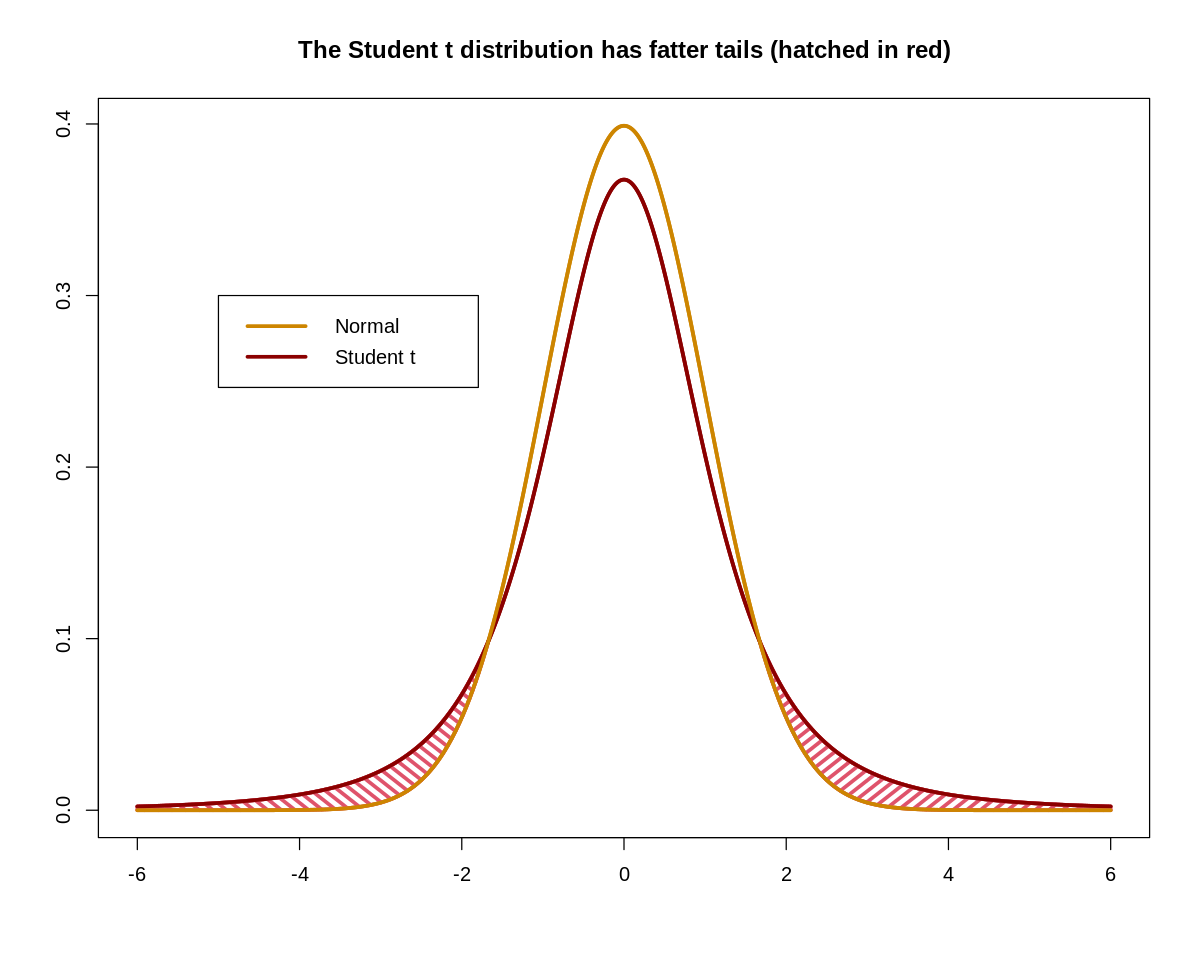

In [ ]:
options(repr.plot.height=8, repr.plot.width=10)

x = seq(-6,6,0.001)
y = dnorm(x)
t = dt(x, 3)
plot(x, y, type='l', col='orange3', lwd=3, xlab='', ylab='', main="The Student t distribution has fatter tails (hatched in red)")
lines(x, t, col='red4', lwd=3)
legend(-5,0.3,c('Normal', 'Student t'), lty=c(1,1), lwd=c(3,3),col=c('orange3','red4'))

diff = abs(t - y)

xuppertail = seq(x[which(diff==min(diff))], 6, 0.001)
polygon(c(xuppertail, rev(xuppertail)), c(dt(xuppertail, 3), dnorm(rev(xuppertail))), col=2,
   density=20, angle=45, lwd=3)
xlowtail = seq(-6, -x[which(diff==min(diff))], 0.001)
polygon(c(xlowtail, rev(xlowtail)), c(dt(xlowtail, 3), dnorm(rev(xlowtail))), col=2,
   density=20, angle=135, lwd=3)
lines(x, t, col='red4', lwd=3)
lines(x, y, col='orange3', lwd=3)

For a population with unknown mean  and unknown standard deviation, a confidence interval for the population mean, based on a simple random sample of size $n,$ is 

$$ \bar x \pm \left( \text{t quantile}_{\alpha/2}(\text{df}=n-1)\right) \frac s{\sqrt{n}}$$ 

so $t$ is the upper $(1-\gamma)/2$ critical value for the $t$ distribution with $n-1$ degrees of freedom.

In [ ]:
n = 40
xbar = 176.4
s = 6.7
alphahalf = (1 - 0.98)/2

xbar + c(1, -1) * qt(alphahalf, n - 1) * s/sqrt(n)

[1] 173.8302 178.9698

In [ ]:
# (b) What can we assert with ​98% confidence about the possible size of our error 
# if we estimate the mean height of all college students to be 176.4 ​centimeters?

# The margin of error is

xbar + abs(qt(alphahalf, n - 1)) * s/sqrt(n)

[1] 178.9698

✅

> A random sample of 13 graduates of a certain secretarial school typed an average of 75.2 words per minute with a standard deviation of 7.3 words per minute. Assuming a normal distribution for the number of words typed per​ minute, find a ​95% confidence interval for the average number of words typed by all graduates of this school.

In [ ]:
# Again we don't have the population standard deviation sigma. So we have to do with the sample s (i.e. need Student t distr)

n = 13
xbar = 75.2
s = 7.3
alphahalf = (1 - 0.95) / 2

xbar + c(1, -1) * qt(alphahalf, n - 1) * s/sqrt(n)

[1] 70.78865 79.61135

✅

A coin is biased such that a head is six times as likely to occur as a tail. Find the expected number of tails when this coin is tossed twice.

The sample space of a coin $\Omega =\{H, T\}.$ We want the $\Pr(H) = p.$ Let's call the $\Pr(T) =q.$ We know that $p/q = 6.$ We also know $p + q = 1.$ Therefore, $6q + q = 1.$ Hence, $q=1/7$ and $p = 6/7.$

The expectation of the random variable $X=\text{no. T's when tossed twice}$ is

$$\mathbb E[X]= \sum_{\Omega=\omega}x\cdot P(X=x)$$

The sample space of $X$ is $\{2, 1,0\}$. Therefore,

$$\mathbb E[X]=2\cdot {2\choose2} \cdot (1/7)^2 + 1 \cdot {2 \choose 1} \cdot 6/7 \cdot 1/7 + 0\cdot {2 \choose 0}\cdot (6/7)^2$$

In [ ]:
2 * choose(2,2) * (1/7)^2 + 1 * choose(2,1) * 6/7 * 1/7 

[1] 0.2857143

This is a binomial distribution with $p=6/7$ and $q=1/7.$ The expectation of a binomial distribution is $np.$ Therefore $\mathbb E[X]=2\cdot 1/7.$

In [ ]:
2 * 1/7

[1] 0.2857143

✅

A random sample of  $20$  chocolate energy bars of a certain brand​ has, on​ average,  $290$  calories per​ bar, with a standard deviation of  35  calories. Construct a ​ $99$% confidence interval for the true mean calorie content of this brand of energy bar. Assume that the distribution of the calorie content is approximately normal.

The formula for the CI is

$$\bar x \pm t_{\alpha/2, \text{df}}\, \frac{s}{\sqrt n}$$

Since the population standard deviation $\sigma$ is unknown, and we need to resort to the sample standard deviation $s$, we use the Student t distribution instead of the normal distribution, which would identically be expressed as

$$\bar x \pm Z_{\alpha/2}\, \frac{\sigma}{\sqrt n}$$

This is immediate to see if we think about how a given value from a normal distribution with mean $\mu$ and standard deviation $\sigma$ is normalized (scaled):

$$z = \frac{x - \mu}{\sigma}$$

The square root of $n$ is due to the fact that we are dealing with the distribution of samples, not individual measurements. Otherwise, it is the equivalent of reorganizing the expression to leave $\mu$ on the RHS.

The value we need to estimate is such that we accept a total risk of $\alpha$ of not including the true population mean in the CI. However, we can over or under-estimate the bounds, and that is why we divide alpha by $2.$

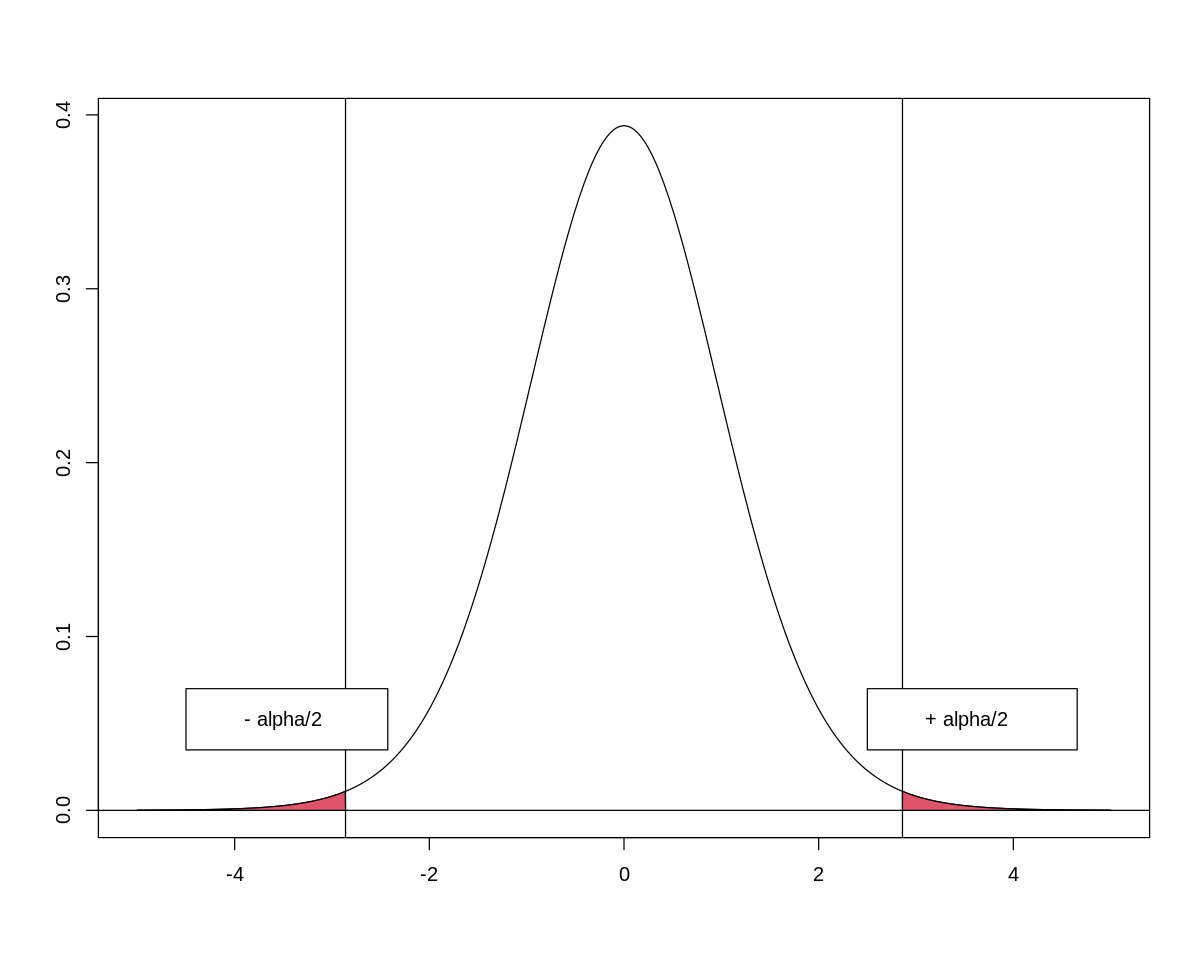

In [ ]:
x = seq(-5, 5, 0.004)
y = dt(x, 19)
plot(x,y, type='l', xlab="", ylab="")
abline(v = qt(0.01/2,19))
abline(v = qt(1-0.01/2,19))
abline(h=0)

X = seq(-5, qt(0.01/2,19),0.004)
Y = dt(X,19)
polygon(c(-5,X, qt(0.01/2,19)), c(0,Y,0), col=2)
Xup = seq(qt(1-0.01/2,19),5,0.004)
Yup = dt(Xup,19)
polygon(c(qt(1-0.01/2,19),Xup,5), c(0,Yup,0), col=2)
legend(- 4.5,0.07,'- alpha/2')
legend(+ 2.5,0.07,'+ alpha/2')

In [ ]:
n= 20
x.bar = 290
s = 35
df = n - 1
alpha.half = 0.01/2

x.bar + c(-1, 1) * qt(alpha.half, df) * s/sqrt(n)

[1] 312.3904 267.6096

✅

An experiment involves tossing a pair of​ dice, one green and one​ red, and recording the numbers that come up. If $x$ equals the outcome on the green die and $y$ the outcome on the red​ die, the sample space S consists of all the possible ordered pairs​ $(x,y).$ Event $A$ is the event that the sum is less than $5$. Event $B$ is the event that a $3$ occurs on either die. Event $C$ is the event that a number greater than $4$ comes up on the green die. Assume that all elements of the sample space are equally likely to occur. Complete parts​ (a) through​ (c) below.

(a) Find the probability of event $A$. $\Pr(A) =6/36 = 1/6$

(b) Find the probability of event $C.$ $\Pr(C) = 12/36 = 1/3$

(c) Find the $\Pr(A \cap C)=0$

The event $$A=\{(\color{green}1, \color{red}1), (\color{green}1, \color{red}2), (\color{green}1, \color{red}3), (\color{green}2, \color{red}1),  (\color{green}2, \color{red}2), (\color{green}3, \color{red}1)\}$$

The key to understanding the answer is the word **ordered** in 'ordered pairs'. Notice the dice are made distinct also to help reach the right answer by making the first green and the second red in these ordered pairs $ (\color{green}x, \color{red}y)$.

The 

 $$B=\{ (\color{green}3, \color{red}1),  (\color{green}3, \color{red}2),  (\color{green}3, \color{red}3),  (\color{green}3, \color{red}4), (\color{green}3, \color{red}5), (\color{green}3, \color{red}6),  (\color{green}1, \color{red}3),  (\color{green}2, \color{red}3),  (\color{green}4, \color{red}3), (\color{green}5, \color{red}3),  (\color{green}6, \color{red}3)\}$$

The event 

$$C=\{ (\color{green}5, \color{red}1),  (\color{green}5, \color{red}2),  (\color{green}5, \color{red}3),  (\color{green}5, \color{red}4),  (\color{green}5, \color{red}5),  (\color{green}5, \color{red}6), (\color{green}6, \color{red}1),  (\color{green}6, \color{red}2),  (\color{green}6, \color{red}3),  (\color{green}6, \color{red}4),  (\color{green}6, \color{red}5),  (\color{green}6, \color{red}6)\}$$

✅




Problem 5.75 (page 188) 

The lifetimes of televisons have a normal distribution with mean $\mu =2000$ hours and a SD of $\sigma = 60.$ If $n=10$ televisions are selected at random, find the probability that the sample standard deviation (a) will not exceed $50$ hours, and (b) lie between $50$ and $70$ hours.

From [this post](https://math.stackexchange.com/a/1722108/152225):

The statistic


$$
S^2 = \frac 1 {n-1}\sum_{i=1}^n (X_i - \bar X)^2
$$


is an unbiased estimator of the variance of a normally distributed population, and it can be shown that


$$
\frac{(n-1)S^2}{\sigma^2} \sim \chi^2_{n-1}$$

Applying the test statistic above:

$$\text{test.stat} =\frac{(n-1)S^2}{\sigma^2}=9 \frac{50^2}{60^2} \sim \chi^2_{9} $$

In [ ]:
n = 10
sig = 60
quant = 50
test.stat = (n - 1) * quant^2 / sig^2
pchisq(test.stat, n - 1)

[1] 0.2853401

This is different than the result in the back of the book; however I think it is correct, because performing a quick Monte Carlo simulation:

In [ ]:
# Monte Carlo
set.seed(0)
num.simul = 1e5 # 100,000
sd.sams = replicate(num.simul, sd(rnorm(10,2000,60)))
mean(sd.sams<50)

[1] 0.28546

In [ ]:
# As for the question between 50 and 70 hours:

mean(sd.sams > 50 & sd.sams < 70)

# OR

pchisq((n - 1) * 70^2/sig^2, n - 1) - pchisq(test.stat, n - 1)

[1] 0.51442

[1] 0.5150803

✅

I have calculated that I get a "Like" on my new Instagram posts every $20$ seconds on average for the first two hours after I upload a picture. What is the probability that I will have to wait for longer than $1$ minute to see the next 👍?

To solve this problem, you can watch [this video](https://online.stat.psu.edu/stat414/lesson/15/15.3).

This is typical problem of waiting times in a Poisson process, and are modelled as an exponential distribution. The exponential distribution is governed by a single parmeter lambda $\lambda.$ Lambda is the rate of arrival, which is $1/20.$

The pdf of the exponential distribution is $\lambda\ \exp(-\lambda x).$ To find the answer to the question we need to integrate the probability (i.e. the area under the curve) from $60$ sec to infinity:

$$\int_{60}^\infty \lambda \; \exp(-\lambda x) dx$$

✅

What is the variance of a random variable $X$ with pdf $f_X(x)=\frac 1 2 \sin(x)$ with domain $x \in [0,\pi]$?

As a preliminary, we can check this is a valid distribution (adds up to $1$):


$$\int_0^\pi \frac 1 2 \sin(x) = \left. -\frac 1 2\cos(x) \right|_0^\pi=1$$

Variance can be expressed as

$$\text{Var}[X]= \mathbb E [X^2]- \left(\mathbb E[X]\right)^2$$

To calculate the expectation of our RV...

$$\mathbb E[X]=\int_0^\pi \frac 1 2 x \sin(x) dx=\pi/4$$

---

As a reminder, this can be solved with integration by parts. We want to make the $x$ within the integral above "disappear" so we end up with an easy trig integral. To do so we can define $u  = x$ in the integration by parts equation:

$$\int uv'= uv - \int u'v$$

In this way $u'=1$ is simply one. That implies that $v'=\sin(x).$ Putting it all together,

$$\begin{align}
u=x &\implies du= 1 dx\\
v= -\cos(x) &\implies dv = \sin(x) dx
\end{align}$$

Substituting,

$$\begin{align}
\frac 1 2 \int_0^\pi x \sin(x) dx &= \frac 1 2\left (\left. -x\cos(x) \right|_0^\pi \; -\; \int_0^\pi - \cos(x)dx  \right )\\[2ex]
&=\frac 1 2\left (\left(\pi - 0 \right) \; -\; \left.  \sin(x)\right|_0^\pi  \right )\\[2ex]
&=\pi/2
\end{align}$$


---

We also need the expectation of $X^2$, which by LOTUS ("law of the unconscious statistician"),

$$\mathbb E[X^2]=\int_0^\pi x^2 \sin(x) dx =1/4( \pi^2 -4).$$

Now we are ready to calculate the variance:

$$\text{Var}[X]= 1/4(\pi^2 - 4) -(\pi/4)^2$$

✅

The expectation of a random variable $X$ is $\mathbb E[X]=5$ and $\text{Var}(X)=10.$ Calculate

(a) $\mathbb E(5 +X)^2$

(b) $\text{Var}(2 + 6X)$

From [this YT presentation](https://www.youtube.com/watch?v=uzAdCLNr9wk&ab_channel=MathbyLEO).

(a) First let's unfold the expression as

$$\mathbb E \left( 5 +X\right)^2=\mathbb E\left(25 +10X + X^2\right)\tag 1$$

since expectation is a linear operator, then we can express $(1)$ as:

$$\begin{align}
\mathbb E\left(25 +10X + X^2\right)&=\mathbb E(25)+ \mathbb E(10X) + \mathbb E(X^2)\\[2ex]
&= 25 + 10 \, \mathbb E(X) + \mathbb E(X^2) \tag 2
\end{align}$$

The last step is to realize that $\text{Var}(X)= \mathbb E(X^2)-\left(\mathbb E(X)\right)^2$. Therefore, $\left(\mathbb E(X)\right)^2 + \text{Var}(X)= \mathbb E(X^2).$ Hence, going back to $(2),$


$$\mathbb E \left( 5 +X\right)^2=25 +50+ 25 + 10=110$$

---

(b) $\text{Var}(2 + 6X)=\text{Var}(6X)=6^2 \,\text{Var(X)}=36 \times 10=360.$ 
